<a href="https://colab.research.google.com/github/jan-kreischer/UZH_Network-Science_Final-Project/blob/main/index_adrian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import networkx as nx
!pip install EoN
import EoN
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [75]:
def plot_degree_distribution(graph, xscale='linear', yscale='linear', bins=20, density=True):
    graph_degrees = graph.degree()
    graph_degrees = [graph_degrees[i] for i in graph.nodes()]
    fig, ax = plt.subplots()
    title = "Degree Distribution "

    if xscale == 'log':
        title+="Log"
        binlog = np.logspace(np.log10(min(graph_degrees)),np.log10(max(graph_degrees)), bins)
        plt.hist(graph_degrees, binlog, density = density, alpha=0.5)
        plt.xlabel('log k')
    else:
        title+="Lin"
        plt.hist(graph_degrees, bins = bins, density = density, alpha=0.5)
        plt.xlabel('k')
        
    if yscale == 'log':
        plt.ylabel("log P(k)")
        title+="-Log Scale"
    else:
        plt.ylabel("P(k)")
        title+="-Lin Scale"
    
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.title(title)
    plt.show() 

def simulate_SIR_epidemic(graph, infection_rate, recovery_rate, initial_infecteds=None, tmin=0, tmax=50):
  return EoN.Gillespie_SIR(graph, infection_rate, recovery_rate, initial_infecteds=initial_infecteds, tmin=tmin, tmax=tmax)

def plot_SIR_epidemic(t, S, I, R, title):
  plt.title(title)
  plt.plot(t, S, color="blue", linestyle='dotted', label = 'Susceptible')
  plt.plot(t, I, color="red", linestyle='dashed', label = 'Infected')
  plt.plot(t, R, color="green", linestyle='solid', label = 'Recovered')
  plt.xlabel('$t$')
  plt.ylabel('Number of People')
  plt.legend()  
  plt.show()

In [70]:
def read_haslemere_graph():
  # First we read the CSV: Contact tracing data over 3 days
  tracing_df = pd.read_csv("https://raw.githubusercontent.com/skissler/haslemere/master/Kissler_DataS1.csv")
  tracing_df.info()
  tracing_graph = nx.Graph()
  # Then we add for every contact <= 5m an edge with the attribute distance that shows the exact distance
  for index, row in tracing_df.iterrows():
      if row[3] <= 5 and not tracing_graph.has_edge(row[1], row[2]):
        tracing_graph.add_edge(int(row[1]), int(row[2]), distance=row[3], timestep=row[0])
  return tracing_graph

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102830 entries, 0 to 102829
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   1       102830 non-null  int64
 1   1.1     102830 non-null  int64
 2   390     102830 non-null  int64
 3   17      102830 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
1350 418


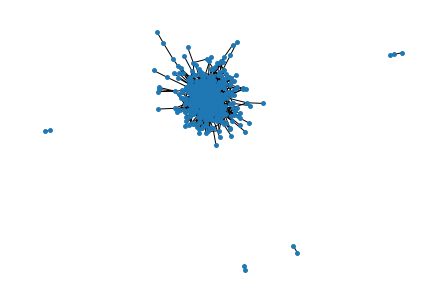

In [71]:
graph = read_haslemere_graph()
print(len(graph.edges), len(graph.nodes))
nx.draw(graph, node_size=15, pos=nx.spring_layout(graph))

In [72]:
nodes = list(graph.nodes())
edges = list(graph.edges(data=True))
print(nodes[0])
print(edges[0:10])

12
[(12, 342, {'distance': 0, 'timestep': 1}), (12, 217, {'distance': 0, 'timestep': 124}), (12, 330, {'distance': 0, 'timestep': 124}), (12, 220, {'distance': 0, 'timestep': 242}), (12, 269, {'distance': 0, 'timestep': 255}), (12, 215, {'distance': 3, 'timestep': 257}), (12, 239, {'distance': 0, 'timestep': 304}), (12, 229, {'distance': 0, 'timestep': 313}), (12, 129, {'distance': 1, 'timestep': 369}), (12, 421, {'distance': 0, 'timestep': 449})]


In [81]:
for component in list(nx.connected_components(graph)):
    if len(component) < 5:
        for node in component:
            graph.remove_node(node)
print(nx.average_shortest_path_length(graph))

3.591890790546047


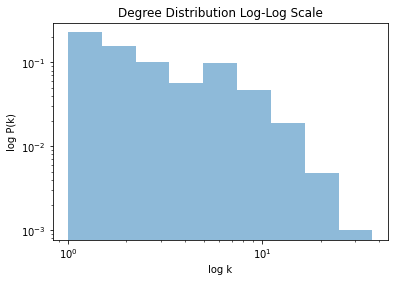

In [99]:
plot_degree_distribution(graph, xscale='log', yscale='log', bins=10)

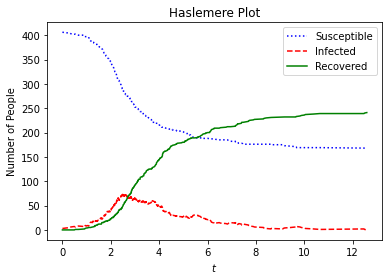

In [95]:
t, S, I, R = simulate_SIR_epidemic(graph, 0.3, 0.95, initial_infecteds=list(graph.nodes)[0:3])
plot_SIR_epidemic(t, S, I, R, "Haslemere Infections")